In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("winequality-red.csv")

In [4]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
df.shape

(1599, 12)

In [9]:
X = df.loc[:,"fixed acidity":"alcohol"]
y = df.quality

In [51]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size = 0.25,random_state = 42)

In [52]:
std = StandardScaler()

In [53]:
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [54]:
logit = LogisticRegression()

In [55]:
logit.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
predictions = logit.predict(X_test_scaled)

In [57]:
accuracy_score(y_test,predictions)

0.57

In [18]:
logit.coef_

array([[ 9.00207019e-02,  1.20908395e-01, -2.16935416e-02,
         7.86897815e-02,  1.34033405e-02,  5.39898795e-02,
        -5.98939049e-02, -1.13140349e-03,  1.46354090e-02,
        -2.77484382e-02, -1.98712217e-01],
       [-1.80433252e-01,  1.76512442e-01, -6.68143800e-02,
         1.53987373e-01,  1.33810875e-02, -4.22325551e-02,
         1.91334174e-02,  2.75037050e-02,  1.43570516e-01,
        -4.37551093e-02, -8.79702344e-03],
       [ 1.36666912e-01,  9.32002891e-01, -5.00643184e-01,
        -8.01448426e-02,  8.88618870e-02, -2.25527020e-02,
         3.39597300e-02,  4.70773564e-01,  1.65232989e+00,
        -3.81530438e-01, -6.30660391e-01],
       [ 2.03624835e-03, -3.57301577e-01,  7.03209942e-02,
        -1.18832642e-01, -2.42649857e-02,  7.53302891e-03,
         1.39949945e-02, -8.39376144e-02, -2.44726630e-01,
         2.23349747e-01,  2.58601101e-01],
       [-2.14125758e-02, -7.88073560e-01,  4.49865126e-01,
        -2.52437580e-02, -7.84529833e-02,  1.52299726e-02,
  

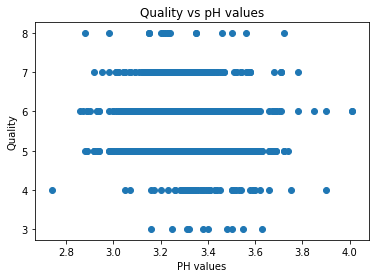

In [36]:
plt.scatter(df.pH,df.quality);
plt.xlabel("PH values");
plt.ylabel("Quality");
plt.title("Quality vs pH values");

In [38]:
df['pH_in_between'] = ((df['pH'] <= 3.6) & (df['pH'] >= 3.2)).astype('int')

In [40]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pH_in_between
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [49]:
X = df.drop(['quality','pH'],axis = 1)
y = df.quality

In [50]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH_in_between
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,1
